<a href="https://colab.research.google.com/github/OmarNashat01/MCIT_Internship/blob/main/Arabic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from __future__ import unicode_literals
# Import the required libraires
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt

%matplotlib inline

import re
import unicodedata

# Pre-processing library
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import nltk
import gensim
!pip install Arabic-Stopwords
import arabicstopwords.arabicstopwords as stp
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
import pyarabic.araby as araby

# !pip install clean-text
# from cleantext import clean
# !pip install emoji==1.7
import unicodedata
!pip install unidecode
from unidecode import unidecode
!pip install emoji
import emoji

# Vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer

from gensim.models import Word2Vec
from gensim.models import FastText

# Mectrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc


# Models 
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier



!pip install arabert

from arabert.preprocess import ArabertPreprocessor

model_name = "aubmindlab/bert-base-arabertv2"
arabert_prep = ArabertPreprocessor(model_name=model_name)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 179 kB 28.6 MB/s 
     |████████████████████████████████| 184 kB 70.5 MB/s 
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186468 sha256=5c0bcd9222fab1b5cacb8de5eff69e49ebe2600b3f80ec3e33aee68df34a5817
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.2.0
    Uninstalling emoji-2.2.0:
      Successfully uninstalled emoji-2.2.0


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


100%|██████████| 241M/241M [00:26<00:00, 9.18MiB/s]


[2022-11-10 12:54:43,018 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [30]:
# !pip install -q kaggle


# from google.colab import files
# files.upload()

# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download -d saurabhshahane/arabic-classification
# !unzip arabic-classification.zip
# !rm arabic-classification.zip

In [31]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Arabic_classification/cleaned_data.csv");
df.head()

,Unnamed: 0,text,targe,clean
0,0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0,استوديوهات و+ رزاز +ات و+ صحراء مرزوكة و+ أثار...
1,1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0,قرر +ت ال+ نجم +ة ال+ أمريكي +ة اوبرا وينفري ا...
2,2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0,اخبار +نا ال+ مغربي +ة ال+ وزاني تصوير ال+ شمل...
3,3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0,اخبار +نا ال+ مغربي +ة قال إبراهيم ال+ راشدي م...
4,4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0,تزال صناع +ة ال+ جلود ال+ مغرب تتبع ال+ طريق +...


In [32]:
df = df.drop_duplicates()
df.duplicated().sum()
df = df.dropna()
df.describe()

,Unnamed: 0,targe
count,105584.000000,105584.000000
mean,55081.276415,2.591463
std,32149.733902,1.454033
min,0.000000,0.000000
25%,27124.750000,1.000000
50%,54964.500000,3.000000
75%,82589.500000,4.000000
max,111727.000000,4.000000


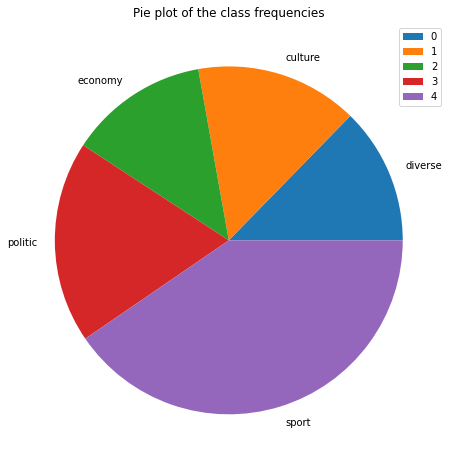

In [33]:
unique, counts = np.unique(df['targe'], return_counts=True)
labels = [ 'diverse', 'culture', 'economy', 'politic','sport']
plt.figure("classe Pie", figsize=(8, 8))
plt.title("Pie plot of the class frequencies")
plt.pie(counts, labels=labels)
plt.legend(unique)
plt.show();

In [40]:
#@title ml_model Class

class ml_model():

    def __init__(self,  model='xgboost',vectorizer='tfidf'):
        
        self.vectorizer_type = vectorizer    
        if vectorizer == 'tfidf':
            self.vectorizer = TfidfVectorizer()
        elif vectorizer == 'word2vec':
            self.vectorizer = gensim.models.Word2Vec()
        elif vectorizer == 'fasttext':
          self.vectorizer = FastText()
            
        self.model_type = model
        if model == 'xgboost':
            self.model = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.9, subsample=0.7,learning_rate=0.08)
        elif model == 'svm':
            self.model = svm.SVC(class_weight='balanced')
        elif model == 'rfc':
            self.model = RandomForestClassifier(class_weight='balanced')
        elif model == 'nb':
            self.model = GaussianNB()
        elif model == 'lr':
            self.model = LogisticRegression(max_iter=300)
            
#         self.pipeline = Pipeline([ ('vectorizer', self.vectorizer), ('model',self.model)]) 

        
        self.stopwords = set(stp.stopwords_list())
        self.emojis_ar = {}
        with open('/content/drive/MyDrive/Colab Notebooks/Data/emojis.csv','r',encoding='utf-8') as f:
            lines = f.readlines()
            
            for line in lines:
                line = line.strip('\n').split(';')
                self.emojis_ar.update({line[0].strip():line[1].strip()})
              
          
        
        
    def load_data(self, df):
        self.df = df.copy()
    
    def clean_review(self, text):

        # text = araby.strip_harakat(text)
        # text = araby.strip_tashkeel(text)
        # text = araby.strip_lastharaka(text)
        # text = araby.strip_diacritics(text)
        # text = araby.strip_tatweel(text)
        # text = araby.strip_shadda(text)
        # text = araby.normalize_ligature(text)
        # text = araby.normalize_hamza(text, method='tasheel')

        # text = word_tokenize(text)
        # # text = " ".join(ISRIStemmer().stem(i) for i in text if i not in self.stopwords)
        # text = " ".join(WordNetLemmatizer().lemmatize(i) for i in text if i not in self.stopwords)
        if not text:
            return text
        text = " ".join(arabert_prep.preprocess(i) for i in word_tokenize(text) if i not in self.stopwords)

        return text

        

    # def remove_emoji(self, text):
    #     emoji_pattern = re.compile("["
    #                                u"\U0001F600-\U0001F64F"  # emoticons
    #                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    #                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
    #                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    #                                u"\U00002702-\U000027B0"
    #                                u"\U000024C2-\U0001F251"
    #                                "]+", flags=re.UNICODE)
    #     text = emoji_pattern.sub(r'', text)
    #     return text



    # def emoji_native_translation(self, text):
    #   if not text:
    #     return text
    #   loves = ["<3", "♥",'❤']
    #   smilefaces = []
    #   sadfaces = []
    #   neutralfaces = []

    #   eyes = ["8",":","=",";"]
    #   nose = ["'","`","-",r"\\"]
    #   for e in eyes:
    #       for n in nose:
    #           for s in ["\)", "d", "]", "}","p"]:
    #               smilefaces.append(e+n+s)
    #               smilefaces.append(e+s)
    #           for s in ["\(", "\[", "{"]:
    #               sadfaces.append(e+n+s)
    #               sadfaces.append(e+s)
    #           for s in ["\|", "\/", r"\\"]:
    #               neutralfaces.append(e+n+s)
    #               neutralfaces.append(e+s)
    #           #reversed
    #           for s in ["\(", "\[", "{"]:
    #               smilefaces.append(s+n+e)
    #               smilefaces.append(s+e)
    #           for s in ["\)", "\]", "}"]:
    #               sadfaces.append(s+n+e)
    #               sadfaces.append(s+e)
    #           for s in ["\|", "\/", r"\\"]:
    #               neutralfaces.append(s+n+e)
    #               neutralfaces.append(s+e)

    #   smilefaces = list(set(smilefaces))
    #   sadfaces = list(set(sadfaces))
    #   neutralfaces = list(set(neutralfaces))
    #   t = []

    #   for w in text.split():
    #       if w in loves:
    #           t.append("حب")
    #       elif w in smilefaces:
    #           t.append("مضحك")
    #       elif w in neutralfaces:
    #           t.append("عادي")
    #       elif w in sadfaces:
    #           t.append("محزن")
    #       else:
    #           t.append(w)
    #   newText = " ".join(t)
    #   return newText

    # def is_emoji(self, word):
    #     if word in self.emojis_ar:
    #         return True
    #     else:
    #         return False
    
    # def add_space(self, text):
    #     return ''.join(' ' + char if self.is_emoji(char) else char for char in text).strip()

    # !pip install aiogoogletrans
    # !pip install asyncio
    # from aiogoogletrans import Translator
    # translator = Translator()
    # import asyncio
    # loop = asyncio.get_event_loop()

    # def translate_emojis(self, words):
    #     word_list = list()
    #     words_to_translate = list()
    #     for word in words :
    #         t = self.emojis_ar.get(word.get('emoji'),None)
    #         if t is None:
    #             word.update({'translation':'عادي','translated':True})
    #             #words_to_translate.append('normal')
    #         else:
    #             word.update({'translated':False,'translation':t})
    #             words_to_translate.append(t.replace(':','').replace('_',' '))
    #         word_list.append(word)
    #     return word_list

    # def emoji_unicode_translation(self, text):
    #     if not text:
    #       return text
    #     text = self.add_space(text)
    #     words = text.split()
    #     text_list = list()
    #     emojis_list = list()
    #     c = 0
    #     for word in words:
    #         if self.is_emoji(word):
    #             emojis_list.append({'emoji':word,'emplacement':c})
    #         else:
    #             text_list.append(word)
    #         c+=1
    #     emojis_translated = self.translate_emojis(emojis_list)
    #     for em in emojis_translated:
    #         text_list.insert(em.get('emplacement'),em.get('translation'))
    #     text = " ".join(text_list)
    #     return text
        
    # def clean_emoji(self, text):
    #     text = self.emoji_native_translation(text)
    #     text = self.emoji_unicode_translation(text)
    #     return text



    def preprocess(self, x):
        
        
        self.data = [self.clean_review(rev) for rev in x]
        
        print(self.data[0:10])
        
        return self.data
    
    def vectorize_data(self, x):
        if self.vectorizer_type == 'tfidf':
            return self.vectorizer.transform(x)
        elif self.vectorizer_type == 'fasttext' or self.vectorizer_type == 'word2vec':
            ft_arr = np.zeros((len(x), 500))
            for i in range(len(x)):
                ft_arr[i,:] = self.wordvec(x[i], 500)

            return ft_arr

    def wordvec(self, x, size):
        vec = np.zeros(size).reshape((1, size))
        count = 0.
        for word in x:
            try:
                vec += self.vectorizer[word].reshape((1, size))
                count += 1.
            except KeyError: # handling the case where the token is not in vocabulary
                            
                continue
        if count != 0:
            vec /= count
        return vec
        
        
    def train(self, x, y):
        x = self.preprocess(x)
        
        if self.vectorizer_type == 'tfidf':
            self.vectorizer.fit_transform(x)
        elif self.vectorizer_type == 'fasttext':
            self.vectorizer = FastText(sentences=x, size= 500)
        elif self.vectorizer == 'word2vec':
            self.vectorizer = Word2Vec(sentences = x, size= 500)



        x = self.vectorize_data(x)
        
        if self.model_type == 'nb':
            self.model.fit(x.toarray(),y)
        else:
            self.model.fit(x,y)
        
    def train_preprocessed(self, x, y):    
        if self.vectorizer_type == 'tfidf':
            self.vectorizer.fit_transform(x)
        elif self.vectorizer_type == 'fasttext':
            self.vectorizer = FastText(sentences=x, size= 500)
        elif self.vectorizer == 'word2vec':
            self.vectorizer = Word2Vec(sentences = x, size= 500)



        x = self.vectorize_data(x)
        
        if self.model_type == 'nb':
            self.model.fit(x.toarray(),y)
        else:
            self.model.fit(x,y)
        
        
    def score(self, x_test, y_test, show=True):
        x_test = self.preprocess(x_test)
        
        x_test = self.vectorize_data(x_test)
        
        if self.model_type == 'nb':
            y_pred = self.model.predict(x_test.toarray())
        else:
            y_pred = self.model.predict(x_test)
        
        self.f1 = f1_score(y_test, y_pred, average="macro")*100
        self.precision = precision_score(y_test, y_pred, average="macro")*(100)
        self.recall = recall_score(y_test, y_pred, average="macro")*100
        self.accuracy = accuracy_score(y_test, y_pred)*100
        # self.auc = roc_auc_score(y_test,y_pred)

        if not show:
          return y_pred

        print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred)}\n')
        print(f'The F1 score is: {self.f1}')
        print(f'The precision score is: {self.precision}')
        print(f'The recall score is: {self.recall}') 
        print(f'The accuracy score is: {self.accuracy}\n\n\n')
        
        # print(f'AUC score is: {self.auc}')
        
        return y_pred



        
    def predict(self, x):
        x = self.clean_review(x)
        
        x = self.vectorize_data([x])
        
        return(self.model.predict(x))
    
    def get_params(self):
        return self.pipeline.get_params()
    
    def draw_roc(self, x, y):
        
        y_pred = self.score(x,y)
        
        clf_fpr, clf_tpr, threshold = roc_curve(y, y_pred)
        auc_clf = auc(clf_fpr, clf_tpr)
        
        plt.figure(figsize=(5, 5), dpi=100)
        plt.plot(clf_fpr, clf_tpr, linestyle='-', label='clf (auc = %0.3f)' % auc_clf)

        plt.xlabel('False Positive Rate -->')
        plt.ylabel('True Positive Rate -->')

        plt.legend()

        plt.show()

    def draw_roc_mult(x, y, models):
        plt.figure(figsize=(5, 5), dpi=100)
        for model in models:
           y_pred = model[0].score(x,y,show=False)
           clf_fpr, clf_tpr, threshold = roc_curve(y, y_pred)
           auc_clf = auc(clf_fpr, clf_tpr)
           
           
           plt.plot(clf_fpr, clf_tpr, linestyle='-', label=f'{model[1]} (auc = %0.3f, f1 = %0.3f)' % (auc_clf,model[0].f1))
        
        plt.xlabel('False Positive Rate -->')
        plt.ylabel('True Positive Rate -->')

        plt.legend()

        plt.show()


In [41]:
svm_tfidf = ml_model('svm', 'tfidf')

In [42]:
train_val_x, test_x, train_val_y, test_y = train_test_split(df['clean'],df['targe'],test_size=0.2,random_state=42)
train_x, val_x, train_y, val_y = train_test_split(train_val_x,train_val_y,test_size=0.2,random_state=42)

train_x.shape, val_x.shape, test_x.shape

((67573,), (16894,), (21117,))

In [43]:
svm_tfidf.train_preprocessed(val_x, val_y)

In [44]:
import pickle

pickle.dump(svm_tfidf,open('/content/drive/MyDrive/Colab Notebooks/Data/Arabic_classification/model_svm_tfidf','wb'))

In [45]:
import pickle
svm = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Data/Arabic_classification/model_svm_tfidf','rb'))
svm

In [46]:
svm_tfidf.score(test_x[:1000],test_y[:1000])


['اقتراب موعد تنصيب حكوم   +ة ال  عدال   +ة و  ال  تنمي   +ة يقود  ها عبد ال  إله بنكيران ظهر شريط فيديو تم تداول  ه ب  شكل واسع شبك  ات ال  تواصل ال  اجتماعي حمل  ت سمير   +ة سيطايل مدير   +ة ال  أخبار ال  قنا   +ة ال  ثاني   +ة حديث قنا   +ة فرنسي   +ة مسوولية احداث ال  إرهابي   +ة الى حزب ال  عدال   +ة و  ال  تنمي   +ة و  أكد  ت سيطايل ل  ال  قنا   +ة ال  فرنسي   +ة ان ال  إسلامي  ين يتشابهون » ، معتبر   +ة ان يسلك  ون طريق ال  عنف و  آخر  ين يدافع  ون ال  عنف ال  صفح  ات ال  أولى ل  صحف  هم و  يجب مواجه  ت  هم و  اعتبر  ت سيطايل ان ال  عدال   +ة و  ال  تنمي   +ة مسوول ال  انفجار  ات أسو   +ة ب  ال  انتحاري  ين ال  ثلاث   +ة تم ال  تغرير طرف أشخاص يمكن ان يكون  و+ أ ال  حزب و  ب  خصوص سوال عدم تغطي   +ة مسير   +ة ال  عدال   +ة و  ال  تنمي   +ة ل  إدان   +ة ال  أحداث ال  إرهابي   +ة قال  ت سيطايل ساقف ضد خطاب ال  عدال   +ة و  ال  تنمي   +ة لان  ه يتلاءم ال  مغرب أريد و   ت سيطايل ال  لقاء ال  تلفزيوني حزب ال  عدال   +ة و  ال  تنمي   +ة ب  حزب ال  جبه   +ة ال  وطني   +ة ال  فرنسي ال  

array([3, 2, 4, 4, 4, 1, 2, 2, 3, 4, 4, 4, 3, 4, 3, 4, 4, 1, 2, 1, 3, 3,
       1, 2, 2, 4, 1, 3, 1, 3, 1, 4, 2, 0, 1, 1, 3, 4, 3, 0, 4, 4, 3, 3,
       4, 2, 4, 1, 4, 2, 4, 0, 2, 0, 4, 4, 4, 4, 4, 1, 1, 0, 1, 1, 0, 1,
       4, 0, 3, 4, 4, 4, 0, 2, 3, 2, 4, 1, 4, 4, 4, 0, 3, 4, 1, 4, 4, 4,
       1, 1, 0, 3, 1, 4, 4, 0, 3, 3, 0, 4, 0, 0, 2, 4, 0, 3, 0, 4, 4, 4,
       3, 4, 0, 2, 4, 4, 3, 1, 2, 0, 4, 4, 2, 4, 3, 4, 4, 2, 2, 2, 2, 1,
       4, 1, 4, 4, 2, 3, 0, 0, 3, 0, 2, 4, 3, 0, 1, 4, 4, 4, 2, 3, 3, 1,
       3, 2, 2, 4, 4, 4, 1, 3, 0, 1, 4, 1, 3, 4, 2, 4, 4, 4, 2, 2, 3, 3,
       2, 3, 3, 0, 4, 1, 4, 2, 2, 1, 3, 3, 4, 0, 4, 1, 1, 4, 4, 3, 0, 4,
       4, 3, 1, 3, 0, 0, 4, 1, 3, 3, 4, 2, 3, 4, 3, 3, 2, 4, 4, 2, 4, 4,
       4, 3, 3, 4, 1, 3, 1, 1, 4, 4, 2, 3, 0, 1, 4, 2, 0, 4, 4, 3, 4, 1,
       4, 4, 4, 1, 1, 3, 4, 3, 1, 0, 3, 3, 3, 2, 2, 0, 0, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 4, 4, 1, 4, 3, 4, 2, 4, 3, 3, 4, 2, 1, 3, 2, 3, 4, 4,
       4, 1, 3, 2, 2, 4, 2, 4, 2, 1, 4, 0, 4, 4, 0,

In [47]:
svm_tfidf.score(test_x,test_y)

['اقتراب موعد تنصيب حكوم   +ة ال  عدال   +ة و  ال  تنمي   +ة يقود  ها عبد ال  إله بنكيران ظهر شريط فيديو تم تداول  ه ب  شكل واسع شبك  ات ال  تواصل ال  اجتماعي حمل  ت سمير   +ة سيطايل مدير   +ة ال  أخبار ال  قنا   +ة ال  ثاني   +ة حديث قنا   +ة فرنسي   +ة مسوولية احداث ال  إرهابي   +ة الى حزب ال  عدال   +ة و  ال  تنمي   +ة و  أكد  ت سيطايل ل  ال  قنا   +ة ال  فرنسي   +ة ان ال  إسلامي  ين يتشابهون » ، معتبر   +ة ان يسلك  ون طريق ال  عنف و  آخر  ين يدافع  ون ال  عنف ال  صفح  ات ال  أولى ل  صحف  هم و  يجب مواجه  ت  هم و  اعتبر  ت سيطايل ان ال  عدال   +ة و  ال  تنمي   +ة مسوول ال  انفجار  ات أسو   +ة ب  ال  انتحاري  ين ال  ثلاث   +ة تم ال  تغرير طرف أشخاص يمكن ان يكون  و+ أ ال  حزب و  ب  خصوص سوال عدم تغطي   +ة مسير   +ة ال  عدال   +ة و  ال  تنمي   +ة ل  إدان   +ة ال  أحداث ال  إرهابي   +ة قال  ت سيطايل ساقف ضد خطاب ال  عدال   +ة و  ال  تنمي   +ة لان  ه يتلاءم ال  مغرب أريد و   ت سيطايل ال  لقاء ال  تلفزيوني حزب ال  عدال   +ة و  ال  تنمي   +ة ب  حزب ال  جبه   +ة ال  وطني   +ة ال  فرنسي ال  

array([3, 2, 4, ..., 3, 2, 4])